In [ ]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar100
import cv2
import numpy as np
import pandas as pd
from keras.losses import KLDivergence
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
from keras.layers import MaxPooling2D
from keras.layers import UpSampling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import Input
from keras.optimizers import Adam
from keras.models import Model

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode="fine")

In [ ]:
X_train.shape

(50000, 32, 32, 3)

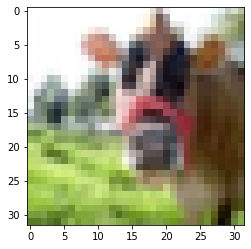

In [ ]:
plt.imshow(X_train[0])

In [ ]:
for i in range(0,50000):
    X_train[i] = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2HSV)
    #y_train[i] = cv2.cvtColor(y_train[i], cv2.COLOR_BGR2HSV)

for j in range(0,10000):
    X_test[j] = cv2.cvtColor(X_test[j], cv2.COLOR_BGR2HSV)
    #y_test[j] = cv2.cvtColor(y_test[j], cv2.COLOR_BGR2HSV)

In [ ]:
X_train_hue = []
X_test_hue = []
X_train_value = []
X_test_value = []
X_train_saturation = []
X_test_saturation = []

In [ ]:
for k in range(0,50000):
  X_train_hue.append(X_train[k][...,0])
  X_train_saturation.append(X_train[k][...,1])
  X_train_value.append(X_train[k][...,2])

for l in range(0,10000):
  X_test_hue.append(X_test[l][...,0])
  X_test_value.append(X_test[l][...,2])
  X_test_saturation.append(X_test[l][...,1])

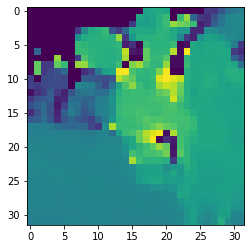

In [ ]:
plt.imshow(X_train_hue[0])

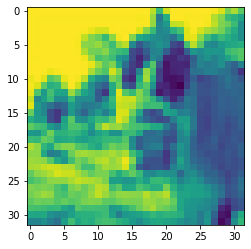

In [ ]:
plt.imshow(X_train_value[0])

In [ ]:
X_train_value = np.array(X_train_value)
X_train_hue = np.array(X_train_hue)
X_test_value = np.array(X_test_value)
X_test_hue = np.array(X_test_hue)
X_train_saturation = np.array(X_train_saturation)
X_test_saturation = np.array(X_test_saturation)

In [ ]:
X_train_value.reshape(50000, 32, 32, 1)
X_train_hue.reshape(50000, 32, 32, 1)
X_train_saturation.reshape(50000, 32, 32, 1)
X_test_saturation.reshape(10000, 32, 32, 1)
X_test_value.reshape(10000, 32, 32, 1)
X_test_hue.reshape(10000, 32, 32, 1)

array([[[[ 10],
         [  9],
         [  9],
         ...,
         [ 13],
         [ 13],
         [ 11]],

        [[  9],
         [  9],
         [ 10],
         ...,
         [ 19],
         [ 18],
         [ 10]],

        [[  5],
         [  7],
         [  9],
         ...,
         [ 26],
         [ 21],
         [  0]],

        ...,

        [[  1],
         [  3],
         [  4],
         ...,
         [143],
         [146],
         [139]],

        [[  3],
         [  4],
         [  4],
         ...,
         [144],
         [158],
         [157]],

        [[  4],
         [  5],
         [  5],
         ...,
         [144],
         [157],
         [161]]],


       [[[ 74],
         [ 74],
         [ 74],
         ...,
         [ 72],
         [ 71],
         [ 69]],

        [[ 74],
         [ 73],
         [ 73],
         ...,
         [ 75],
         [ 75],
         [ 74]],

        [[ 75],
         [ 75],
         [ 75],
         ...,
         [ 74],
         [

In [ ]:
encoder_input = Input(shape=(32, 32, 1))
x = Conv2D(32, (3,3), activation="relu", padding='same')(encoder_input)
x = MaxPooling2D()(x)
x = Conv2D(16, (3,3), activation="relu", padding='same')(x)
x = MaxPooling2D()(x)

In [ ]:
shape = x.shape

In [ ]:
x = Flatten()(x)
encoder_output = Dense(16, activation="relu")(x)

In [ ]:
encoder = Model(encoder_input,encoder_output, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                1640

In [ ]:
decoder_input = Input(shape=(16,))
x = Dense(shape[1]*shape[2]*shape[3])(decoder_input)
x = Reshape((shape[1], shape[2], shape[3]))(x)
x = UpSampling2D()(x)
x = Conv2DTranspose(16, (3,3), activation="relu", padding="same")(x)
x = UpSampling2D()(x)
x = Conv2DTranspose(32, (3,3), activation="relu", padding="same")(x)
# x = Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = Conv2DTranspose(1, 3, activation="sigmoid", padding='same')(x)

In [ ]:
decoder_output.shape

TensorShape([None, 32, 32, 1])

In [ ]:
decoder = Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 16)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              17408     
_________________________________________________________________
reshape_6 (Reshape)          (None, 8, 8, 16)          0         
_________________________________________________________________
up_sampling2d_12 (UpSampling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_transpose_18 (Conv2DT (None, 16, 16, 16)        2320      
_________________________________________________________________
up_sampling2d_13 (UpSampling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_transpose_19 (Conv2DT (None, 32, 32, 32)        4640

In [ ]:
autoencoder_input = Input(shape=(32, 32, 1))
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 32, 32, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 16)                21344     
_________________________________________________________________
decoder (Functional)         (None, 32, 32, 1)         24657     
Total params: 46,001
Trainable params: 46,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(loss = 'mae', optimizer = 'Adam', metrics=["accuracy"])

In [ ]:
# X_train_hue = X_train_hue.astype('float32')/360
# X_test_hue = X_test_hue.astype('float32')/360
# X_train_value = X_train_value.astype('float32')/100
# X_test_value = X_test_value.astype('float32')/100

In [ ]:
autoencoder.fit(X_train_hue, X_train_hue, validation_data=(X_test_hue, X_test_hue), epochs = 1, batch_size = 32)

1563/1563 [==============================] - 7s 4ms/step - loss: 76.6683 - accuracy: 0.0143 - val_loss: 76.7157 - val_accuracy: 0.0166


In [ ]:
hue_decoded = autoencoder.predict(X_test_hue)

In [ ]:
autoencoder.fit(X_train_value, X_train_value, validation_data=(X_test_value, X_test_value), epochs = 1, batch_size = 32)

1563/1563 [==============================] - 7s 4ms/step - loss: 141.1723 - accuracy: 0.0021 - val_loss: 141.5457 - val_accuracy: 0.0022


In [ ]:
value_decoded = autoencoder.predict(X_test_value)

In [ ]:
# X_train_hue = X_train_hue.astype('float32')*360
# X_test_hue = X_test_hue.astype('float32')*360
# X_train_value = X_train_value.astype('float32')*100
# X_test_value = X_test_value.astype('float32')*100

In [ ]:
print(value_decoded.shape);
print(hue_decoded.shape);
print(X_test_saturation.shape);

(10000, 32, 32, 1)
(10000, 32, 32, 1)
(10000, 32, 32)


In [36]:
X_test_saturation.reshape(10000, 32, 32)
hue_decoded = hue_decoded.reshape(10000, 32, 32)
value_decoded = value_decoded.reshape(10000, 32, 32)

In [37]:
print(value_decoded.shape);
print(hue_decoded.shape);
print(X_test_saturation.shape);

(10000, 32, 32)
(10000, 32, 32)
(10000, 32, 32)


In [57]:
example_image = [hue_decoded[0], X_test_saturation[0], value_decoded[0]]

In [59]:
example_image= np.array(example_image)

In [61]:
example_image = np.transpose(example_image, (1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


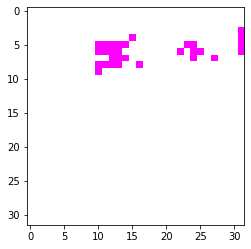

In [64]:
plt.imshow(example_image)

In [65]:
decoded = np.array([hue_decoded, X_test_saturation, value_decoded])

In [67]:
decoded = np.transpose(decoded, (1, 2, 3, 0))